# Thompson Sampling

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [22]:
import random
N = 10000
d = 10
ads_selected = []
number_clicked = [0] * d
number_not_clicked = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0,d):
        random_b = random.betavariate(number_clicked[i] +1 , number_not_clicked[i] + 1)
        if random_b > max_random:
            max_random = random_b
            ad = i

    ads_selected.append(ad)

    reward = dataset.values[n, ad]
    if reward == 1:
        number_clicked[ad] +=1
    else:
        number_not_clicked[ad] +=1
    
    total_reward = total_reward + reward


## Visualising the results - Histogram

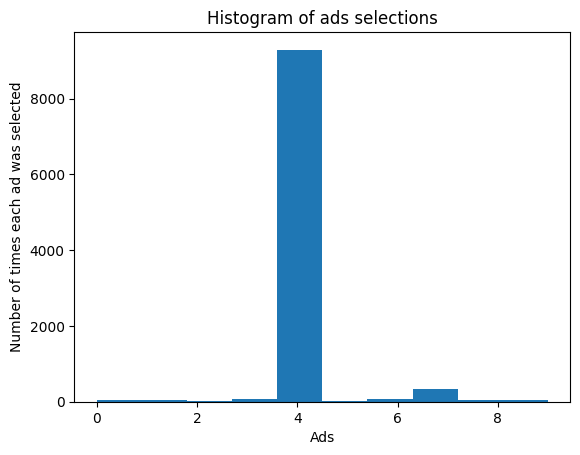

In [23]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()